## RNN(Recurrent Neural Network) : 순환 신경망

#### 순서가 있는 시퀀스 데이터, time series data(시계열 데이터)를 입력하여 예측 
#### 주가 데이터 , 음성데이터, 자연어 처리

RNN의 핵심적인 특징은 네트워크 내부에 루프(loop)를 가지고 있다는 점이며, 이를 통해 정보를 시퀀스의 각 스텝에서 다음 스텝으로 전달합니다.

&nbsp;

RNN의 핵심 개념  
1. 순환 구조: RNN의 각 셀(cell)은 입력 데이터와 함께 이전 스텝의 상태(hidden state)를 받습니다. 이 상태는 시퀀스의 정보를 담고 있으며, 셀이 시퀀스의 각 요소를 처리할 때마다 업데이트됩니다.

2. 시간적 데이터 처리: RNN은 시간에 따라 변화하는 데이터를 처리할 수 있습니다. 이는 과거의 정보를 현재의 결정에 반영할 수 있게 해주며, 시퀀스의 길이에 관계없이 동일한 네트워크와 파라미터를 사용하여 학습할 수 있습니다.

3. 가변 길이의 입력 처리: RNN은 가변 길이의 입력 시퀀스를 처리할 수 있습니다. 이는 예를 들어, 문장이나 문단과 같이 길이가 다양한 입력을 다룰 때 유용합니다.

&nbsp;

RNN의 주요 문제점
1. 그래디언트 소실/폭발: 시퀀스가 길어질수록 RNN은 그래디언트 소실 또는 폭발 문제에 직면할 수 있습니다. 이는 학습 과정에서 가중치의 업데이트가 제대로 이루어지지 않게 만들어, 학습이 어렵거나 불가능하게 만듭니다.

2. 장기 의존성 학습의 어려움: 기본 RNN은 장기 의존성을 학습하기 어렵다는 문제가 있습니다. 이는 과거의 정보가 충분히 전달되지 않아, 시퀀스의 초기 정보가 후반부의 결정에 영향을 미치기 어렵다는 것을 의미합니다.

&nbsp;

RNN의 변형들
1. LSTM(Long Short-Term Memory): 그래디언트 소실 문제를 해결하기 위해 고안된 RNN의 한 변형으로, 장기 의존성을 효과적으로 학습할 수 있습니다.
2. GRU(Gated Recurrent Unit): LSTM을 단순화한 버전으로, 비슷한 성능을 유지하면서 계산 비용을 줄입니다.

[완전연결층]  
각 뉴런이 이전 층의 모든 뉴런과 연결. 순서와 시간에 의존성이 없다.  
이미지 분류, 회귀 분석 등 구조이해도 간단하고, 복잡한 변환의 모델링을 구성.  
고정 크기 입력데이터를 요구함.  

[순환신경망]  
현재의 출력이 이전에 계산에 기반해서 결정. 순서와 시간에 의존성이 높다.  
시계열처리, 자연어, 음성 등 내부 메모리를 가지고 시간에 따른 데이터의 내부 상태를 저장하고 업데이트하도록 구성.  
가변 크기 입력데이터 가능. 복잡한 계산, 학습시간이 오래 걸린다.  

[ LSTM ]  
세개의 게이트로 구성됨. 셀 상태를 도입해서 중요 정보는 장기간 유지하고 불필요한 것은 버리는 구조.  
셀 상태(입력게이트, 망각게이트, 출력 게이트) -> 조건에 따라 CRUD할 수 있다.  

ex) 나는 일한다. -> 나는 오늘 쉰다.  : 현재시점이 "나는 오늘 쉰다"이다. "나는 일한다"는 과거 문장이라서 새로운 활동상태를 현재 문맥에서 더 이상 유용하지 않다고 판단하므로 망각 게이트에서 정보감소 시킴. (망각게이트는 가중치를 통해 자동으로 결정)

In [1]:
'''https://www.tensorflow.org/api_docs/python/tf/keras/layers/RNN'''
import tensorflow as tf
class MinimalRNNCell(tf.keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = backend.dot(inputs, self.kernel)
        output = h + backend.dot(prev_output, self.recurrent_kernel)
        return output, [output]
    
# RNN을 보면 call을 이용해서 전파?전달?하는걸 알 수 있다.

SimpleRNN의 Weight과 bias의 shape 
- N  : batch_size , T : Sequence_length , D : input_dim, H : hidden_size 
- X_all : (N ,T, D) 
- X_1 : (N, D)
- Wx  : (D,H ) 
- Wh  : (H, H) , h_prev :(N,H ) 이기 때문이다.  
- b   : (H) 

### One cell: 4 (input_dim) in 2 (hidden_size)
<img src='etc/rnn_one_cell.png' width=50% align="left"></img> 
shape의 크기는 원핫 인코딩의 벡터 크기. 4개의 입력이 들어오니까 히든사이즈는 2??  
A 에서는 h(t-1) + Xt 가 연산되어 ht가 출력된다.

tf.keras.layers.SimpleRNN  
tf.keras.layers.SimpleRNNCell  
tf.keras.layers.RNN  

SimpleRNNCell 은 말 그대로 셀 그 자체로, RNN에 넣어서 사용해야 한다. 이 때, 다양한 커스터마이징이 가능하다.  
다만, 단순히 셀 하나를 넣은 RNN은 SimpleRNN과 동일한 형태다.  

이 외에도  
LSTMCell  
GRUCell  
등의 Cell 들도 있으며, 이 셀들을 복합적으로 사용하고 싶다면, tf.keras.layers.StackedRNNCells 을 이용해서 쌓아서 이용 가능하다.  
st = StackedRNNCells([LSTMCell, GRUCell, ...])  
RNN(st) -> 복합레이어

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNNCell, RNN, SimpleRNN

# 1. 'hello' 데이터를 원핫 인코딩
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

""" ▶ Step 1. h 하나만 RNN에 넣어 보기 """
# 2. 모델을 실행해서 결과를 리턴  
# 하나의 셀을 RNN 적용   input_dim(4)  -> output_dim (2) 
x_data = np.array([[h]], dtype = np.float32)

hidden_size = 2
cell = SimpleRNNCell(units = hidden_size)
rnn = RNN(cell, return_sequences = True, return_state = True)  # return_sequences = True: 출력으로 시퀀스 전체를 리턴 유무 

outputs, states = rnn(x_data)

# h = [1, 0, 0, 0] 
print(f'x_data: {x_data}, shape: {x_data.shape}')       #X :[N ,T, D]  T: 한 번에 처리되는 시간단계 수, D: 입력 차원
print(f'outputs: {outputs}, shape: {outputs.shape}') #OUT : [N ,T, H]  H: 히든사이즈 hidden_size
print(f'states: {states}, shape: {states.shape}')   #state: [N, H]


x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[ 0.24130654 -0.02812835]]], shape: (1, 1, 2)
states: [[ 0.24130654 -0.02812835]], shape: (1, 2)


In [3]:
# 3. 2번의 모델을  함축시켜  실행해보기
rnn = SimpleRNN(units = hidden_size, return_sequences = True, return_state = True)
outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))    #X :[N ,T, D ]  
print('outputs: {}, shape: {}'.format(outputs, outputs.shape)) #OUT  : [N ,T, H ]
print('states: {}, shape: {}'.format(states, states.shape))    #state : [N, H]

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[-0.04010408  0.6135369 ]]], shape: (1, 1, 2)
states: [[-0.04010408  0.6135369 ]], shape: (1, 2)


### Unfolding to n sequences

<img src='etc/unfolding_to_n_sequences.png' width='50%' align='left'></img> 
hidden_size는 히든 스테이트의 차원 크기  
sequence_length = 단어 길이 즉, 시간의길이나 시간단계를 의미함.  
shape=(1, 5, 2) (q배치크기, 시퀀스길이, 히든 차원 수)

In [4]:
""" ▶ Step 2. hello를 이용해서, sequential data를 RNN에 넣어 보기 """
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

x_data = np.array([[h,e,l,l,o]], dtype=np.float32)

hidden_size = 2
rnn = SimpleRNN(units = hidden_size, return_sequences = True, return_state = True)
outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))    
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))   

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4)
outputs: [[[ 0.5460804   0.5970821 ]
  [-0.5157145  -0.7049707 ]
  [ 0.6977583   0.8821088 ]
  [ 0.4634051  -0.5224492 ]
  [ 0.18856446 -0.1531783 ]]], shape: (1, 5, 2)
states: [[ 0.18856446 -0.1531783 ]], shape: (1, 2)


### Batching input

<img src='etc/rnn_batching_input.png' width='50%' align='left'></img>
배치는 한번에 일괄로 처리하겠다?

In [5]:
""" ▶ Step 3. sequential data를 여러 배치로 RNN에 넣어 보기 """

x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size = 2
rnn = SimpleRNN(units = hidden_size, return_sequences = True, return_state = True)
outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))    
print('outputs: {}, shape: {}'.format(outputs, outputs.shape)) 
print('states: {}, shape: {}'.format(states, states.shape))   

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4)
outputs: [[[ 0.63636464  0.26858145]
  [ 0.3160694  -0.2447505 ]
  [ 0.03315001 -0.8627621 ]
  [-0.56464666 -0.8359088 ]
  [-0.86916    -0.49098697]]

 [[-0.1098488   0.27717802]
  [-0.13258637 -0.5775922 ]
  [-0.39098644 -0.74774694]
  [-0.5711604  -0.6458156 ]
  [-0.5387701  -0.5127421 ]]

 [[ 0.17667325 -0.731372  ]
  [-0.4406332  -0.8637552 ]
  [-0.7869603   0.4325448 ]
  [ 0.08188006  0.8216183 ]
  [ 0.75727075 -0.6514856 ]]], shape: (3, 5, 2)
states: [[-0.86916    -0.49098697]
 [-0.5387701  -0.5127421 ]
 [ 0.75727075 -0.6514856 ]], shape: (3, 2)


1.0
1.0


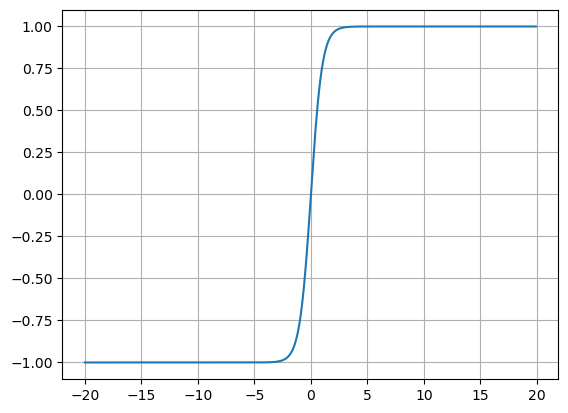

In [6]:
import matplotlib.pyplot as plt

x = np.arange(-200,200)
x = x/10
y = np.tanh(x)

plt.plot(x,y)
plt.grid(True)
print(np.tanh(19))
print(np.tanh(20))